# Lab9 -fMNIST Classification with Dense Neural Networks

In [1]:
from tensorflow import keras
from tensorflow.keras import layers
import tensorflow as tf

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, precision_recall_curve
from sklearn.model_selection import train_test_split

## 1. Get the data from Kaggle

In [3]:
train_data = pd.read_csv("./data/fashion-mnist_train.csv")
test_data = pd.read_csv("./data/fashion-mnist_test.csv")

In [4]:
y_train = train_data.iloc[:, 0].to_numpy()
X_train = train_data.iloc[:, 1:].to_numpy()
y_test = test_data.iloc[:, 0].to_numpy()
X_test = test_data.iloc[:, 1:].to_numpy()

In [5]:
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.16666)

In [6]:
X_train.shape, y_train.shape

((50000, 784), (50000,))

In [7]:
X_val.shape, y_val.shape

((10000, 784), (10000,))

In [8]:
X_test.shape, y_test.shape

((10000, 784), (10000,))

## 2. Run Great EDA

1) Distribution of target variable

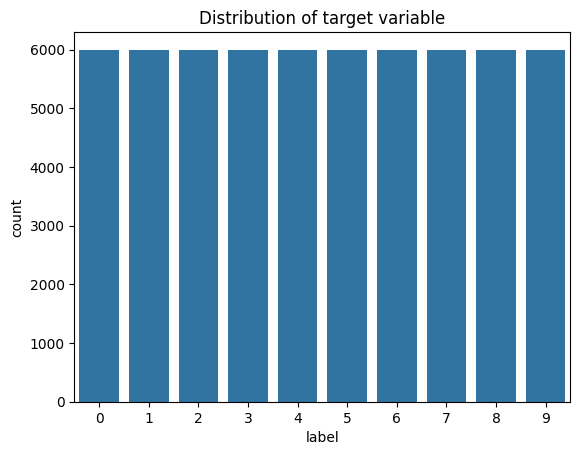

In [9]:
sns.countplot(data = train_data, x='label')
plt.title("Distribution of target variable")
plt.show()

* This countplot shows the distribution of a target variable with labels from 0 to 9. 
* It seems that the classes are well balanced, with the same number of labels from 0 to 9.

2) Distribution of pixel value

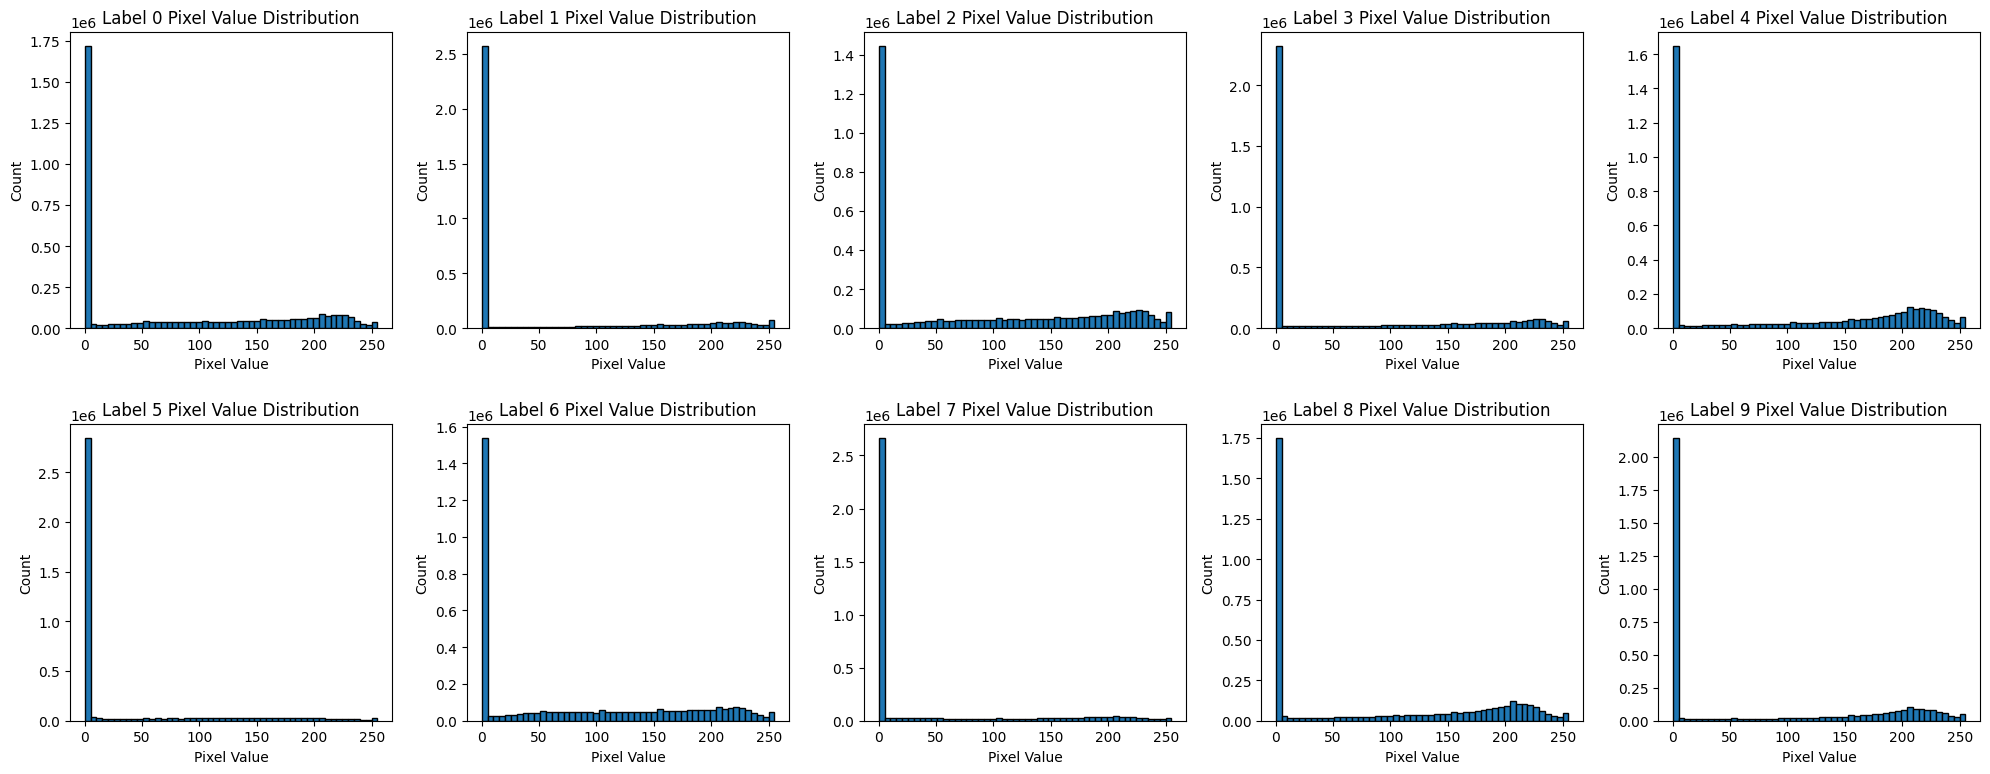

In [10]:
fig, axes = plt.subplots(2, 5, figsize=(20, 8))
axes = axes.ravel()

for i in range(10):
    images = X_train[y_train == i]
    pixels = images.flatten()
    axes[i].hist(pixels, bins=50, edgecolor='black')
    axes[i].set_title(f'Label {i} Pixel Value Distribution')
    axes[i].set_xlabel('Pixel Value')
    axes[i].set_ylabel('Count')

plt.tight_layout()
plt.show()

* The histograms show the pixel value distributions for images. 
* For all labels(0-9), there is a large spike at the pixel value 0, which suggests the image is very dark or black.
* The distribution patterns are quite similar across all labels. They all have the significant peak at pixel value 0, and almost negligible counts for higher pixel values, except for a few pixels.

3) Sum of the images

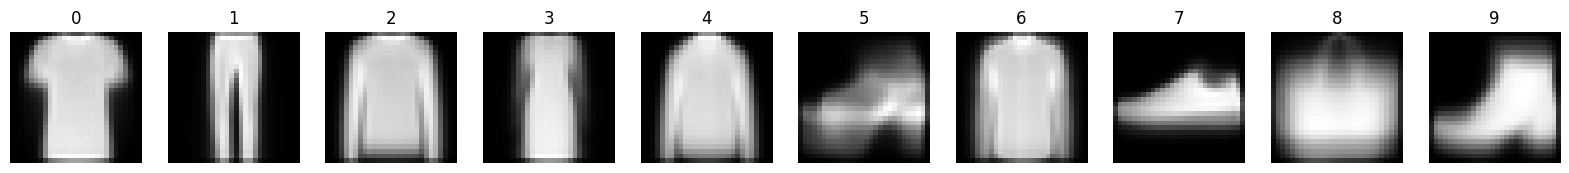

In [11]:
fig, axes = plt.subplots(1, 10, figsize=(20, 2))
for digit in range(10):
    digit_indices = np.where(y_train.astype('int8') == digit)[0]
    avg_image = np.mean(X_train[digit_indices], axis=0).reshape(28, 28)
    axes[digit].imshow(avg_image, cmap='gray')
    axes[digit].set_title(str(digit))
    axes[digit].axis('off')
plt.show()

* The images are accumulated each image for each label.
* image 2, 4, and 6 have similar images, which means it can be difficult to be categorized.

## 3. Define and Train a fully-connected feedforward neural network of the choice using Keras and Tensorflow

In [12]:
model = keras.Sequential([
    layers.Dense(512, activation="relu"),
    layers.Dense(10, activation="softmax")
])

In [13]:
model.compile(optimizer="rmsprop",  # RMSProp is discussed in the Optimizers section
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])

In [14]:
model.fit(X_train, y_train, epochs=5, batch_size=128)

Epoch 1/5
391/391 [==============================] - 9s 16ms/step - loss: 26.9862 - accuracy: 0.7115
Epoch 2/5
391/391 [==============================] - 6s 16ms/step - loss: 0.8451 - accuracy: 0.7821
Epoch 3/5
391/391 [==============================] - 6s 15ms/step - loss: 0.6285 - accuracy: 0.8135
Epoch 4/5
391/391 [==============================] - 5s 13ms/step - loss: 0.5681 - accuracy: 0.8303
Epoch 5/5
391/391 [==============================] - 5s 12ms/step - loss: 0.5439 - accuracy: 0.8388


## 4. Evaluate the model using the validation dataset. 

In [15]:
predictions = model.predict(X_val)
prediction_class = np.argmax(predictions, axis=1)

313/313 [==============================] - 1s 3ms/step


1) accuracy

In [16]:
print("accuracy:", accuracy_score(y_val, prediction_class))

accuracy: 0.8236


* accuracy is 83.05%, which means it correctly predicts the class 83.05% of the time across all classes. It is generally a good accuracy rate.

2. Confusion matrix

In [17]:
df_confusion_matrix = pd.DataFrame(confusion_matrix(y_val, prediction_class))
df_confusion_matrix 

,0,1,2,3,4,5,6,7,8,9
0,886,0,14,36,10,0,64,0,17,0
1,1,958,6,26,4,0,6,0,0,1
2,12,0,620,9,279,1,43,0,21,0
3,35,6,11,872,24,0,11,1,6,0
4,2,3,33,54,873,0,11,1,6,0
5,0,0,1,0,0,923,0,33,1,9
6,217,1,75,30,322,0,353,1,21,0
7,0,0,0,0,0,41,0,991,3,7
8,2,1,7,2,8,9,22,6,944,0
9,0,1,0,0,0,33,0,157,0,816


* The model did quite well on most classes, as indicated by the high numbers on the diagonal.
* Many instances are incorrectly labeled as class 6. As I found in EDA, pixel value 2, 4, and 6 are difficult to be categorized because they have similar patterns.


3) precision, recall, and f1-score

In [18]:
precision = precision_score(y_val, prediction_class, average=None)
recall = recall_score(y_val, prediction_class, average=None)
f1 = f1_score(y_val, prediction_class, average=None)

df_evaluate = pd.DataFrame({
    'precision': precision, 
    'recall': recall, 
    'f1-score': f1
    })
df_evaluate

,precision,recall,f1-score
0,0.767100,0.862707,0.812099
1,0.987629,0.956088,0.971602
2,0.808344,0.629442,0.707763
3,0.847425,0.902692,0.874185
4,0.574342,0.888098,0.697563
5,0.916584,0.954498,0.935157
6,0.692157,0.346078,0.461438
7,0.832773,0.951056,0.887993
8,0.926398,0.943057,0.934653
9,0.979592,0.810328,0.886957


* Class 5, 7, 8, 9 have high precision and recall with over 0.90, indicating the models perfom very well on these classes.
* Class 6 stands out with particularly low precision and recall (0.54, 0.61), resulting in the lowest f1-score among all classes, suggesting that this class is often confused with other classes.

## 5. Run the model on the test set, and provide clear and relevant conclusions

1) accuracy

In [19]:
predictions = model.predict(X_test)
prediction_class = np.argmax(predictions, axis=1)

122/313 [==========>...................] - ETA: 0s

313/313 [==============================] - 1s 4ms/step


In [20]:
print("accuracy:", accuracy_score(y_test, prediction_class))

accuracy: 0.8227


* accuracy is 83.03%, which means it correctly predicts the class 83.03% of the time across all classes. It is generally a good accuracy rate.

2) Confusion matrix

In [21]:
df_confusion_matrix = pd.DataFrame(confusion_matrix(y_test, prediction_class))
df_confusion_matrix 

,0,1,2,3,4,5,6,7,8,9
0,869,0,21,21,7,3,60,2,17,0
1,4,962,3,22,3,0,5,0,1,0
2,14,0,631,12,284,0,42,0,17,0
3,40,5,12,905,18,0,15,0,5,0
4,0,2,29,71,885,0,11,0,2,0
5,0,0,0,0,0,941,0,34,4,21
6,211,1,67,23,309,0,357,0,32,0
7,0,0,0,0,0,40,0,943,0,17
8,3,0,7,2,5,7,20,13,943,0
9,0,0,0,0,0,41,0,168,0,791


* The model did quite well on most classes, as indicated by the high numbers on the diagonal.
* Many instances are incorrectly labeled as class 6. As I found in EDA, pixel value 2, 4, and 6 are difficult to be categorized because they have similar patterns.

3) precision, recall, f1-score

In [22]:
precision = precision_score(y_test, prediction_class, average=None)
recall = recall_score(y_test, prediction_class, average=None)
f1 = f1_score(y_test, prediction_class, average=None)

df_evaluate = pd.DataFrame({
    'precision': precision, 
    'recall': recall, 
    'f1-score': f1
    })
df_evaluate

,precision,recall,f1-score
0,0.761613,0.869,0.811770
1,0.991753,0.962,0.976650
2,0.819481,0.631,0.712994
3,0.857008,0.905,0.880350
4,0.585705,0.885,0.704898
5,0.911822,0.941,0.926181
6,0.700000,0.357,0.472848
7,0.812931,0.943,0.873148
8,0.923604,0.943,0.933201
9,0.954162,0.791,0.864954


* Class 8, 9 have high precision and recall with over 0.90, indicating the models perfom very well on these classes.
* Class 6 stands out with particularly low precision and recall (0.53, 0.61), resulting in the lowest f1-score among all classes, suggesting that this class is often confused with other classes.

Conclusions
* The model's overall accuracy is slightly decreased to 0.8303 from the previously 0.8305. This minor change suggests that the performance of the model remains consistent.
* Class 8, 9 have high precision and recall, showing excellent performance.
* Continue with model diagnostic focusing on error analysis for classes with lower performance, especially for class 6. 

## 6. What if we wanted to increase the precision for class'5', how can we do that without changing the model or retraining?

changing decision threshold can increase precision or recall. Since precision and recall are trade-off on performance. <br>

* Increasing precision: <br>
increasing decision threshold can increase precision. By doing this, we can classify only those instances as positive where the model is more confident, which should reduce the number of false positives.

* Increasing Recall: <br>
decreasing the decision threshold can increase recall. By doing this, more instances can be classifed as the chosen class, which should reduce the number of false negatives.


In [23]:
y_scores = model.predict(X_test)[:, 5]
y_true_binary = (y_test == 5)
precisions, recalls, thresholds = precision_recall_curve(y_true_binary, y_scores)

110/313 [=========>....................] - ETA: 0s

313/313 [==============================] - 1s 3ms/step


In [24]:
idx = (precisions >= precision[5]).argmax()
threshold = thresholds[idx]
threshold

0.48781064

Original precision and recall values at threshold 0.44
* precision: 0.987
* recall: 0.896

Increasing precision

In [25]:
threshold = 0.7
new_pred = (y_scores >= threshold)
new_precision = precision_score(y_true_binary, new_pred)
new_recall = recall_score(y_true_binary, new_pred)
print("threshold:", threshold)
print("new precision:", new_precision)
print("new recall:", new_recall)

threshold: 0.7
new precision: 0.9275074478649454
new recall: 0.934


## 7. What if we wanted to increase the recall for class '5', how can we do that without changing the model or retraining?

Increasing recall

In [26]:
threshold = 0.1
new_pred = (y_scores >= threshold)
new_precision = precision_score(y_true_binary, new_pred)
new_recall = recall_score(y_true_binary, new_pred)
print("threshold:", threshold)
print("new precision:", new_precision)
print("new recall:", new_recall)

threshold: 0.1
new precision: 0.867513611615245
new recall: 0.956


## Step3: Instead of just one neural network, explore 3 different neural networks (by changing any hyperparameter of your choice)

In [27]:
from keras.callbacks import ModelCheckpoint
from keras.optimizers import Adam
from keras.layers import LeakyReLU
from keras.models import load_model


1st added layers

In [28]:
model1 = keras.Sequential([
    layers.Dense(512, activation="relu"),
    layers.Dense(256, activation="relu"),
    layers.Dense(10, activation="softmax")
])

model1.compile(optimizer="rmsprop",  
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])

In [29]:
checkpoint_filepath = 'best_model.1'  # Filepath where you want to save the model

model_checkpoint_callback_1 = ModelCheckpoint(
    filepath=checkpoint_filepath,
    save_weights_only=False,  # Optionally save only weights instead of the full model
    monitor='val_loss',
    mode='min',  # Monitor validation loss and save on minimum
    save_best_only=True)

2nd optimizer changed to "adam"

In [30]:
model2 = keras.Sequential([
    layers.Dense(512, activation="relu"),
    layers.Dense(10, activation="softmax")
])

model2.compile(optimizer="adam",  
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])

In [31]:
checkpoint_filepath = 'best_model.2'  # Filepath where you want to save the model

model_checkpoint_callback_2 = ModelCheckpoint(
    filepath=checkpoint_filepath,
    save_weights_only=False,  # Optionally save only weights instead of the full model
    monitor='val_loss',
    mode='min',  # Monitor validation loss and save on minimum
    save_best_only=True)

3rd changed activation function to LeakyRELU

In [32]:
model3 = keras.Sequential([
    layers.Dense(512),
    LeakyReLU(alpha=0.1),
    layers.Dense(10, activation="softmax")
])

model3.compile(optimizer="rmsprop",  
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])

In [33]:
checkpoint_filepath = 'best_model.3'  # Filepath where you want to save the model

model_checkpoint_callback_3 = ModelCheckpoint(
    filepath=checkpoint_filepath,
    save_weights_only=False,  # Optionally save only weights instead of the full model
    monitor='val_loss',
    mode='min',  # Monitor validation loss and save on minimum
    save_best_only=True)

### plot the training and validation loss and accuracy for each one of them

In [34]:
history = model1.fit(X_train,
                    y_train,
                    epochs=30,
                    batch_size=128,
                    validation_data=(X_val, y_val),
                    callbacks=[model_checkpoint_callback_1])

history_dict = history.history
history_dict.keys()

Epoch 1/30


391/391 [==============================] - ETA: 0s - loss: 10.2275 - accuracy: 0.6953

INFO:tensorflow:Assets written to: best_model.1\assets


INFO:tensorflow:Assets written to: best_model.1\assets


391/391 [==============================] - 8s 17ms/step - loss: 10.2275 - accuracy: 0.6953 - val_loss: 1.1403 - val_accuracy: 0.7163
Epoch 2/30
388/391 [============================>.] - ETA: 0s - loss: 0.7576 - accuracy: 0.7826

INFO:tensorflow:Assets written to: best_model.1\assets


INFO:tensorflow:Assets written to: best_model.1\assets


391/391 [==============================] - 6s 16ms/step - loss: 0.7570 - accuracy: 0.7826 - val_loss: 0.8204 - val_accuracy: 0.7629
Epoch 3/30
386/391 [============================>.] - ETA: 0s - loss: 0.5685 - accuracy: 0.8176

INFO:tensorflow:Assets written to: best_model.1\assets


INFO:tensorflow:Assets written to: best_model.1\assets


391/391 [==============================] - 5s 13ms/step - loss: 0.5685 - accuracy: 0.8177 - val_loss: 0.5443 - val_accuracy: 0.8192
Epoch 4/30
386/391 [============================>.] - ETA: 0s - loss: 0.4826 - accuracy: 0.8373

INFO:tensorflow:Assets written to: best_model.1\assets


INFO:tensorflow:Assets written to: best_model.1\assets


391/391 [==============================] - 5s 13ms/step - loss: 0.4825 - accuracy: 0.8370 - val_loss: 0.4785 - val_accuracy: 0.8404
Epoch 5/30
389/391 [============================>.] - ETA: 0s - loss: 0.4463 - accuracy: 0.8468

INFO:tensorflow:Assets written to: best_model.1\assets


INFO:tensorflow:Assets written to: best_model.1\assets


391/391 [==============================] - 5s 14ms/step - loss: 0.4467 - accuracy: 0.8468 - val_loss: 0.4765 - val_accuracy: 0.8507
Epoch 6/30
391/391 [==============================] - 4s 10ms/step - loss: 0.4341 - accuracy: 0.8527 - val_loss: 0.6377 - val_accuracy: 0.8182
Epoch 7/30
391/391 [==============================] - 5s 13ms/step - loss: 0.4118 - accuracy: 0.8584 - val_loss: 0.6427 - val_accuracy: 0.8328
Epoch 8/30
391/391 [==============================] - 5s 14ms/step - loss: 0.4115 - accuracy: 0.8616 - val_loss: 0.4944 - val_accuracy: 0.8507
Epoch 9/30
391/391 [==============================] - 4s 10ms/step - loss: 0.4067 - accuracy: 0.8610 - val_loss: 0.6083 - val_accuracy: 0.8220
Epoch 10/30
391/391 [==============================] - 4s 11ms/step - loss: 0.3947 - accuracy: 0.8651 - val_loss: 0.5095 - val_accuracy: 0.8630
Epoch 11/30
391/391 [==============================] - 4s 10ms/step - loss: 0.3910 - accuracy: 0.8699 - val_loss: 0.4952 - val_accuracy: 0.8558
Epoch 12

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

Text(0.5, 1.0, 'Training and validation loss')

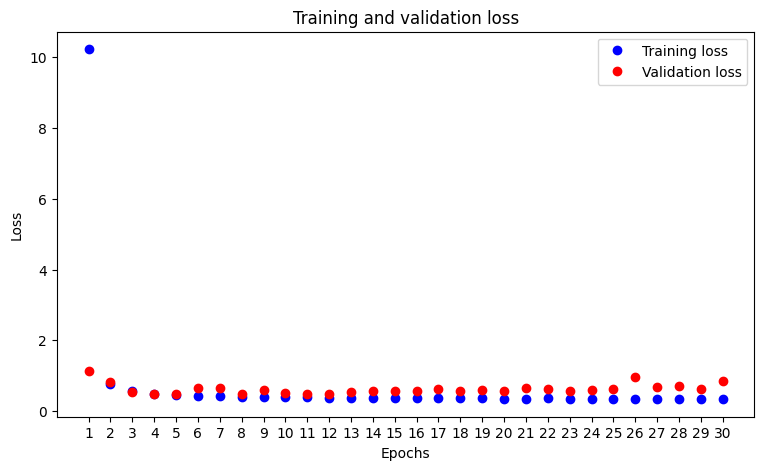

In [35]:
# plot the training and validation loss
plt.figure(figsize=(9, 5))
loss_values = history_dict["loss"]
val_loss_values = history_dict["val_loss"]
epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, loss_values, "bo", label="Training loss")
plt.plot(epochs, val_loss_values, "ro", label="Validation loss")
plt.xlabel("Epochs")
plt.xticks(epochs)
plt.ylabel("Loss")
plt.legend()
plt.title("Training and validation loss")

Text(0.5, 1.0, 'Training and validation accuracy')

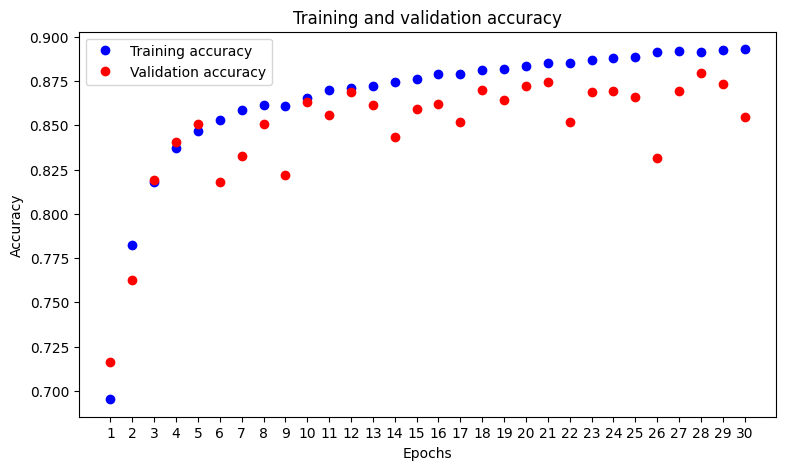

In [36]:
plt.figure(figsize=(9, 5))
loss_values = history_dict["accuracy"]
val_loss_values = history_dict["val_accuracy"]
epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, loss_values, "bo", label="Training accuracy")
plt.plot(epochs, val_loss_values, "ro", label="Validation accuracy")
plt.xlabel("Epochs")
plt.xticks(epochs)
plt.ylabel("Accuracy")
plt.legend()
plt.title("Training and validation accuracy")

In [37]:
history = model2.fit(X_train,
                    y_train,
                    epochs=30,
                    batch_size=128,
                    validation_data=(X_val, y_val),
                    callbacks=[model_checkpoint_callback_2])

history_dict = history.history
history_dict.keys()

Epoch 1/30
387/391 [============================>.] - ETA: 0s - loss: 11.3922 - accuracy: 0.7634

INFO:tensorflow:Assets written to: best_model.2\assets


INFO:tensorflow:Assets written to: best_model.2\assets


391/391 [==============================] - 5s 12ms/step - loss: 11.3063 - accuracy: 0.7638 - val_loss: 2.6200 - val_accuracy: 0.7966
Epoch 2/30
389/391 [============================>.] - ETA: 0s - loss: 1.2674 - accuracy: 0.7989

INFO:tensorflow:Assets written to: best_model.2\assets


INFO:tensorflow:Assets written to: best_model.2\assets


391/391 [==============================] - 5s 13ms/step - loss: 1.2661 - accuracy: 0.7986 - val_loss: 0.7500 - val_accuracy: 0.7934
Epoch 3/30
391/391 [==============================] - ETA: 0s - loss: 0.5517 - accuracy: 0.8238

INFO:tensorflow:Assets written to: best_model.2\assets


INFO:tensorflow:Assets written to: best_model.2\assets


391/391 [==============================] - 4s 11ms/step - loss: 0.5517 - accuracy: 0.8238 - val_loss: 0.5857 - val_accuracy: 0.8282
Epoch 4/30
386/391 [============================>.] - ETA: 0s - loss: 0.4482 - accuracy: 0.8464

INFO:tensorflow:Assets written to: best_model.2\assets


INFO:tensorflow:Assets written to: best_model.2\assets


391/391 [==============================] - 5s 14ms/step - loss: 0.4484 - accuracy: 0.8465 - val_loss: 0.5562 - val_accuracy: 0.8289
Epoch 5/30
391/391 [==============================] - ETA: 0s - loss: 0.3928 - accuracy: 0.8596

INFO:tensorflow:Assets written to: best_model.2\assets


INFO:tensorflow:Assets written to: best_model.2\assets


391/391 [==============================] - 5s 12ms/step - loss: 0.3928 - accuracy: 0.8596 - val_loss: 0.5049 - val_accuracy: 0.8508
Epoch 6/30
391/391 [==============================] - 4s 10ms/step - loss: 0.3719 - accuracy: 0.8654 - val_loss: 0.5714 - val_accuracy: 0.8303
Epoch 7/30
391/391 [==============================] - 4s 9ms/step - loss: 0.3605 - accuracy: 0.8684 - val_loss: 0.5139 - val_accuracy: 0.8453
Epoch 8/30
387/391 [============================>.] - ETA: 0s - loss: 0.3519 - accuracy: 0.8726

INFO:tensorflow:Assets written to: best_model.2\assets


INFO:tensorflow:Assets written to: best_model.2\assets


391/391 [==============================] - 4s 11ms/step - loss: 0.3514 - accuracy: 0.8727 - val_loss: 0.4966 - val_accuracy: 0.8546
Epoch 9/30
388/391 [============================>.] - ETA: 0s - loss: 0.3488 - accuracy: 0.8743

INFO:tensorflow:Assets written to: best_model.2\assets


INFO:tensorflow:Assets written to: best_model.2\assets


391/391 [==============================] - 5s 13ms/step - loss: 0.3489 - accuracy: 0.8741 - val_loss: 0.4782 - val_accuracy: 0.8575
Epoch 10/30
386/391 [============================>.] - ETA: 0s - loss: 0.3555 - accuracy: 0.8719

INFO:tensorflow:Assets written to: best_model.2\assets


INFO:tensorflow:Assets written to: best_model.2\assets


391/391 [==============================] - 5s 12ms/step - loss: 0.3549 - accuracy: 0.8719 - val_loss: 0.4715 - val_accuracy: 0.8569
Epoch 11/30
390/391 [============================>.] - ETA: 0s - loss: 0.3523 - accuracy: 0.8719

INFO:tensorflow:Assets written to: best_model.2\assets


INFO:tensorflow:Assets written to: best_model.2\assets


391/391 [==============================] - 5s 13ms/step - loss: 0.3524 - accuracy: 0.8719 - val_loss: 0.4454 - val_accuracy: 0.8665
Epoch 12/30
391/391 [==============================] - 3s 9ms/step - loss: 0.3488 - accuracy: 0.8729 - val_loss: 0.4763 - val_accuracy: 0.8612
Epoch 13/30
391/391 [==============================] - 4s 10ms/step - loss: 0.3543 - accuracy: 0.8721 - val_loss: 0.4954 - val_accuracy: 0.8546
Epoch 14/30
391/391 [==============================] - 4s 9ms/step - loss: 0.3623 - accuracy: 0.8694 - val_loss: 0.4808 - val_accuracy: 0.8576
Epoch 15/30
391/391 [==============================] - 3s 9ms/step - loss: 0.3460 - accuracy: 0.8753 - val_loss: 0.4606 - val_accuracy: 0.8507
Epoch 16/30
388/391 [============================>.] - ETA: 0s - loss: 0.3507 - accuracy: 0.8733

INFO:tensorflow:Assets written to: best_model.2\assets


INFO:tensorflow:Assets written to: best_model.2\assets


391/391 [==============================] - 4s 11ms/step - loss: 0.3510 - accuracy: 0.8734 - val_loss: 0.4446 - val_accuracy: 0.8631
Epoch 17/30
391/391 [==============================] - 4s 10ms/step - loss: 0.3438 - accuracy: 0.8751 - val_loss: 0.4633 - val_accuracy: 0.8546
Epoch 18/30
391/391 [==============================] - 4s 9ms/step - loss: 0.3378 - accuracy: 0.8770 - val_loss: 0.4616 - val_accuracy: 0.8593
Epoch 19/30
389/391 [============================>.] - ETA: 0s - loss: 0.3466 - accuracy: 0.8734

INFO:tensorflow:Assets written to: best_model.2\assets


INFO:tensorflow:Assets written to: best_model.2\assets


391/391 [==============================] - 5s 12ms/step - loss: 0.3467 - accuracy: 0.8732 - val_loss: 0.4320 - val_accuracy: 0.8655
Epoch 20/30
391/391 [==============================] - 4s 10ms/step - loss: 0.3402 - accuracy: 0.8769 - val_loss: 0.4656 - val_accuracy: 0.8505
Epoch 21/30
391/391 [==============================] - 4s 9ms/step - loss: 0.3444 - accuracy: 0.8754 - val_loss: 0.4883 - val_accuracy: 0.8482
Epoch 22/30
391/391 [==============================] - 4s 9ms/step - loss: 0.3315 - accuracy: 0.8799 - val_loss: 0.4640 - val_accuracy: 0.8566
Epoch 23/30
391/391 [==============================] - 3s 9ms/step - loss: 0.3271 - accuracy: 0.8805 - val_loss: 0.4626 - val_accuracy: 0.8626
Epoch 24/30
391/391 [==============================] - 3s 9ms/step - loss: 0.3252 - accuracy: 0.8816 - val_loss: 0.4527 - val_accuracy: 0.8581
Epoch 25/30
391/391 [==============================] - 4s 9ms/step - loss: 0.3207 - accuracy: 0.8834 - val_loss: 0.4503 - val_accuracy: 0.8664
Epoch 26/

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

Text(0.5, 1.0, 'Training and validation loss')

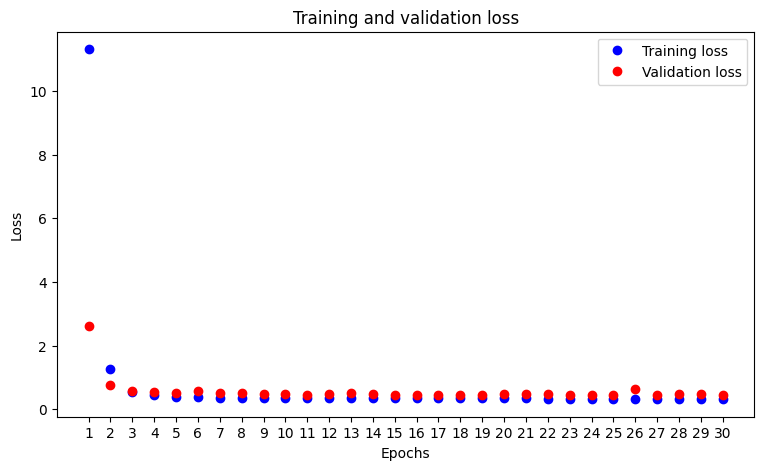

In [38]:
# plot the training and validation loss
plt.figure(figsize=(9, 5))
loss_values = history_dict["loss"]
val_loss_values = history_dict["val_loss"]
epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, loss_values, "bo", label="Training loss")
plt.plot(epochs, val_loss_values, "ro", label="Validation loss")
plt.xlabel("Epochs")
plt.xticks(epochs)
plt.ylabel("Loss")
plt.legend()
plt.title("Training and validation loss")

Text(0.5, 1.0, 'Training and validation accuracy')

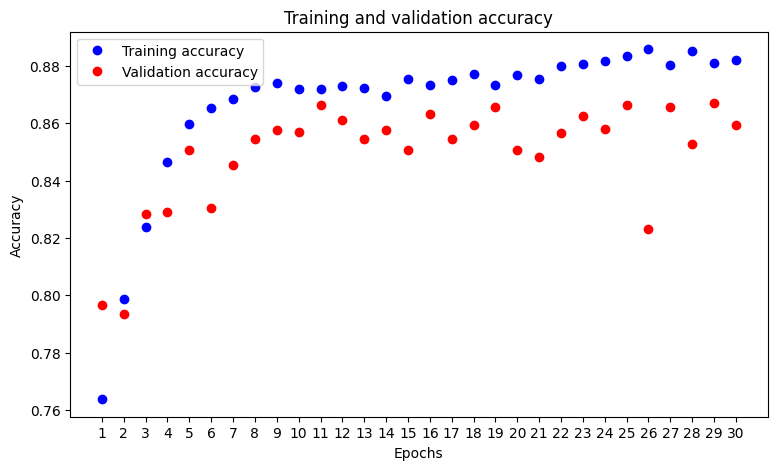

In [39]:
import matplotlib.pyplot as plt
plt.figure(figsize=(9, 5))
loss_values = history_dict["accuracy"]
val_loss_values = history_dict["val_accuracy"]
epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, loss_values, "bo", label="Training accuracy")
plt.plot(epochs, val_loss_values, "ro", label="Validation accuracy")
plt.xlabel("Epochs")
plt.xticks(epochs)
plt.ylabel("Accuracy")
plt.legend()
plt.title("Training and validation accuracy")

In [40]:
history = model3.fit(X_train,
                    y_train,
                    epochs=30,
                    batch_size=128,
                    validation_data=(X_val, y_val),
                    callbacks=[model_checkpoint_callback_3])

history_dict = history.history
history_dict.keys()

Epoch 1/30
391/391 [==============================] - ETA: 0s - loss: 32.0251 - accuracy: 0.7084

INFO:tensorflow:Assets written to: best_model.3\assets


INFO:tensorflow:Assets written to: best_model.3\assets


391/391 [==============================] - 5s 11ms/step - loss: 32.0251 - accuracy: 0.7084 - val_loss: 16.1411 - val_accuracy: 0.7604
Epoch 2/30
386/391 [============================>.] - ETA: 0s - loss: 8.5436 - accuracy: 0.7684

INFO:tensorflow:Assets written to: best_model.3\assets


INFO:tensorflow:Assets written to: best_model.3\assets


391/391 [==============================] - 5s 13ms/step - loss: 8.5523 - accuracy: 0.7680 - val_loss: 3.5259 - val_accuracy: 0.8256
Epoch 3/30
388/391 [============================>.] - ETA: 0s - loss: 5.0296 - accuracy: 0.7806

INFO:tensorflow:Assets written to: best_model.3\assets


INFO:tensorflow:Assets written to: best_model.3\assets


391/391 [==============================] - 4s 11ms/step - loss: 5.0219 - accuracy: 0.7809 - val_loss: 2.9334 - val_accuracy: 0.7899
Epoch 4/30
391/391 [==============================] - 4s 10ms/step - loss: 3.5042 - accuracy: 0.7858 - val_loss: 4.0117 - val_accuracy: 0.7714
Epoch 5/30
391/391 [==============================] - 3s 9ms/step - loss: 2.8667 - accuracy: 0.7892 - val_loss: 4.5301 - val_accuracy: 0.7764
Epoch 6/30
386/391 [============================>.] - ETA: 0s - loss: 2.5818 - accuracy: 0.7979

INFO:tensorflow:Assets written to: best_model.3\assets


INFO:tensorflow:Assets written to: best_model.3\assets


391/391 [==============================] - 5s 13ms/step - loss: 2.5770 - accuracy: 0.7980 - val_loss: 2.7955 - val_accuracy: 0.8045
Epoch 7/30
388/391 [============================>.] - ETA: 0s - loss: 2.3130 - accuracy: 0.8002

INFO:tensorflow:Assets written to: best_model.3\assets


INFO:tensorflow:Assets written to: best_model.3\assets


391/391 [==============================] - 4s 11ms/step - loss: 2.3156 - accuracy: 0.8002 - val_loss: 1.7630 - val_accuracy: 0.8250
Epoch 8/30
391/391 [==============================] - 4s 11ms/step - loss: 2.1590 - accuracy: 0.8062 - val_loss: 3.0087 - val_accuracy: 0.7718
Epoch 9/30
391/391 [==============================] - 3s 9ms/step - loss: 2.0922 - accuracy: 0.8102 - val_loss: 10.5998 - val_accuracy: 0.6074
Epoch 10/30
391/391 [==============================] - 4s 9ms/step - loss: 2.0568 - accuracy: 0.8136 - val_loss: 2.9211 - val_accuracy: 0.7839
Epoch 11/30
391/391 [==============================] - 4s 10ms/step - loss: 2.0082 - accuracy: 0.8170 - val_loss: 2.4009 - val_accuracy: 0.8017
Epoch 12/30
391/391 [==============================] - 3s 9ms/step - loss: 2.0082 - accuracy: 0.8194 - val_loss: 2.0306 - val_accuracy: 0.8115
Epoch 13/30
389/391 [============================>.] - ETA: 0s - loss: 1.8160 - accuracy: 0.8259

INFO:tensorflow:Assets written to: best_model.3\assets


INFO:tensorflow:Assets written to: best_model.3\assets


391/391 [==============================] - 7s 18ms/step - loss: 1.8133 - accuracy: 0.8259 - val_loss: 1.3709 - val_accuracy: 0.8487
Epoch 14/30
391/391 [==============================] - 5s 12ms/step - loss: 1.8164 - accuracy: 0.8260 - val_loss: 3.0384 - val_accuracy: 0.8037
Epoch 15/30
391/391 [==============================] - 4s 10ms/step - loss: 1.8230 - accuracy: 0.8270 - val_loss: 1.7127 - val_accuracy: 0.8349
Epoch 16/30
391/391 [==============================] - 3s 9ms/step - loss: 1.7900 - accuracy: 0.8309 - val_loss: 3.1016 - val_accuracy: 0.7566
Epoch 17/30
391/391 [==============================] - 3s 9ms/step - loss: 1.7898 - accuracy: 0.8320 - val_loss: 1.9884 - val_accuracy: 0.8110
Epoch 18/30
391/391 [==============================] - 4s 9ms/step - loss: 1.7877 - accuracy: 0.8335 - val_loss: 1.7073 - val_accuracy: 0.8255
Epoch 19/30
391/391 [==============================] - 4s 9ms/step - loss: 1.8005 - accuracy: 0.8354 - val_loss: 2.2170 - val_accuracy: 0.8201
Epoch 20

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

Text(0.5, 1.0, 'Training and validation loss')

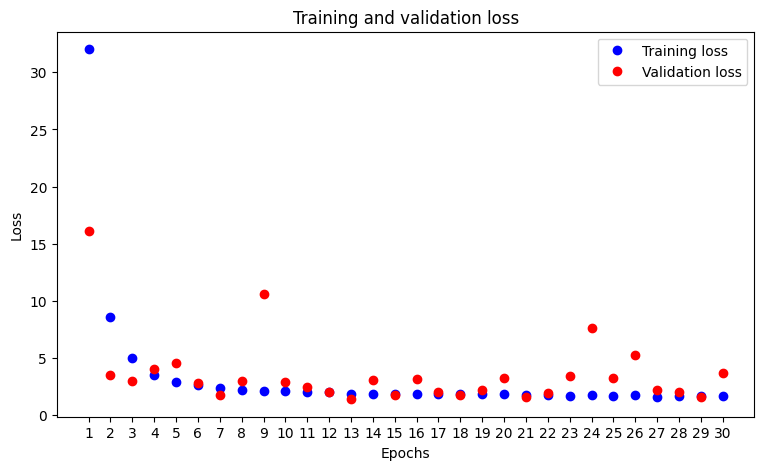

In [41]:
# plot the training and validation loss
plt.figure(figsize=(9, 5))
loss_values = history_dict["loss"]
val_loss_values = history_dict["val_loss"]
epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, loss_values, "bo", label="Training loss")
plt.plot(epochs, val_loss_values, "ro", label="Validation loss")
plt.xlabel("Epochs")
plt.xticks(epochs)
plt.ylabel("Loss")
plt.legend()
plt.title("Training and validation loss")

Text(0.5, 1.0, 'Training and validation accuracy')

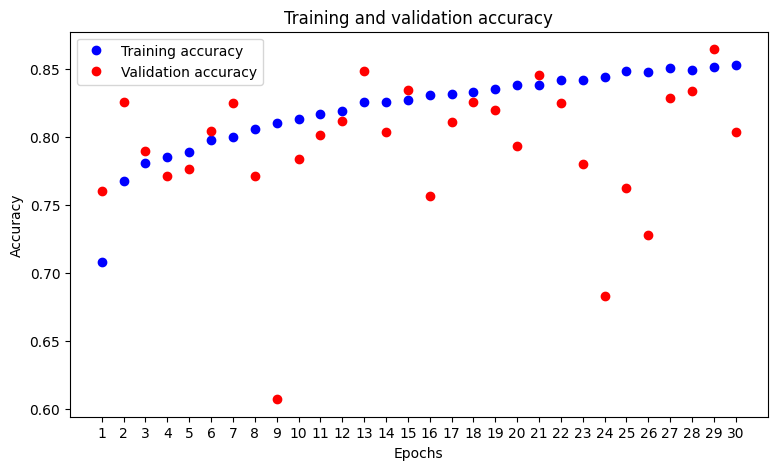

In [42]:
import matplotlib.pyplot as plt
plt.figure(figsize=(9, 5))
loss_values = history_dict["accuracy"]
val_loss_values = history_dict["val_accuracy"]
epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, loss_values, "bo", label="Training accuracy")
plt.plot(epochs, val_loss_values, "ro", label="Validation accuracy")
plt.xlabel("Epochs")
plt.xticks(epochs)
plt.ylabel("Accuracy")
plt.legend()
plt.title("Training and validation accuracy")

### For each of the 3 identify the best set of weights based on the graphs or additional considerations where the main purpose is to avoid over-fitting.

* Model1(added layers): The validation loss is quite high at the beginning but drops significantly and starts to converge with the training loss. As the epochs increase, the gap narrows. However, the training loss continues to drop while the validation loss begins slightly increase, indicating the start of overfitting. The best set of weights for model 1 would be at the epoch just before the validation loss increases. maybe epoch 11 will be the best set of weights.
* Model2(optimizer changed to "adam"): This graph shows a good convergence of training and validation loss. The validation loss decreases and stabilizes alongside the training loss. There's no clear sign of overfitting, as the validation loss doesn't increase as epochs go by. The best set of weights for model2 would likely be the end of the training process where the validation loss is at its lowest and most stable (epoch 30).
* Model3(activation function changed to LeakyRELU): This graph shows that the training loss decreases consistently, which is good. However, the validation loss is generally higher than the training loss, which could indicate overfitting. The best set of weights may be around the epoch where the validation loss is at its lowest before it starts increasing again (epoch 13).

### Summarize your reasoning clearly.

model1(added layers) is the best model. 

* model1(added layers) shows that the training loss decreases steadily, but the validation loss is constant, with no gap to the training loss as the epochs progress. This may indicate that the model is not overfitting the training data and is learning reliably. So, it can be a good model. The training accuracy increases over time and reaches near 90%. The validation accuracy increases as well, though not as smoothly, and seems to stabilize around 85%.

* model2(optimizer changed to "adam") shows that the training and validation losses are very close, within a narrow range. This model is likely the best because the validation loss is relatively low and stable. Both the training and validation accuracies increase over time. The training accuracy surpasses the validation accuracy by a small margin, indicating possible slight overfitting.

* model3(activation function changed to LeakyRELU) shows that the training loss decreases significantly, but the validation loss is unstable and sometimes appears higher than the training loss. This may indicate that the model is overfitting and is not generalizing well to the validation data.There is a clear increase in training accuracy, but the validation accuracy increases at a slower rate and exhibits more variance, again indicating overfitting.

In conclusion, model1 appears to be the best model because the lowest difference between training and validation metrics, which indicates good generalization along with high and stable accuracy, which model1 demonstrates.

## Step4: With the best model chosen above, and using its best weights as found above (see saving and loading a model), run the evaluation as requested in lab 8

In [48]:
best_model = load_model('best_model.1') 

1. accuracy

In [49]:
predictions = best_model.predict(X_test)
prediction_class = np.argmax(predictions, axis=1)

313/313 [==============================] - 1s 2ms/step


In [50]:
print("accuracy:", accuracy_score(y_test, prediction_class))

accuracy: 0.853


* accuracy is 85.03%, which means it correctly predicts the class 85.03% of the time across all classes. It is generally a good accuracy rate.

2. Confusion matrix

In [52]:
df_confusion_matrix = pd.DataFrame(confusion_matrix(y_test, prediction_class))
df_confusion_matrix 

,0,1,2,3,4,5,6,7,8,9
0,882,0,32,40,4,0,31,0,11,0
1,5,962,5,23,3,0,2,0,0,0
2,15,0,855,11,108,0,9,0,2,0
3,35,13,17,903,28,1,2,0,1,0
4,0,0,126,43,825,0,4,0,2,0
5,0,0,0,1,0,922,1,48,4,24
6,245,1,183,39,199,0,320,0,13,0
7,0,0,0,0,0,12,0,948,1,39
8,2,1,18,1,5,1,3,2,963,4
9,0,0,0,0,0,6,0,42,2,950


* The model did quite well on most classes, as indicated by the high numbers on the diagonal.
* Many instances are incorrectly labeled as class 6. As I found in EDA, pixel value 0, 2, 4, and 6 are difficult to be categorized because they have similar patterns.

3. precision, recall, f1-score

In [53]:
precision = precision_score(y_test, prediction_class, average=None)
recall = recall_score(y_test, prediction_class, average=None)
f1 = f1_score(y_test, prediction_class, average=None)

df_evaluate = pd.DataFrame({
    'precision': precision, 
    'recall': recall, 
    'f1-score': f1
    })
df_evaluate

,precision,recall,f1-score
0,0.744932,0.882,0.807692
1,0.984647,0.962,0.973192
2,0.691748,0.855,0.764758
3,0.851084,0.903,0.876274
4,0.703925,0.825,0.759669
5,0.978769,0.922,0.949537
6,0.860215,0.320,0.466472
7,0.911538,0.948,0.929412
8,0.963964,0.963,0.963482
9,0.934120,0.950,0.941993


* Class 1, 5, 7, 8, 9 have high precision and recall with over 0.90, indicating the models perfom very well on these classes.
* Class 6 stands out with particularly low precision and recall (0.86, 0.32), resulting in the lowest f1-score(0.47) among all classes, suggesting that this class is often confused with other classes.